# Homework week 1 - data visualization

Author: Son Nguyen

Gitlab repos: https://gitlab.com/ntson.sh

Cài đặt **folium** map library

*pip install folium*

Cài đặt **geopy** library - chuyển đổi địa chỉ sang tọa độ GPS

*pip install geopy*

### **NOTE**

Remove file bus_stop_location.csv và addrs_dict.pkl (nếu có) trong thư mục hiện tại nếu bạn muốn follow step, hoặc không thì có thể sử dụng luôn các file dataset này, kết quả cũng sẽ không đổi nhưng sẽ không còn nhiều các bước clean và grab data nữa.

### Result
![week1_screenshot](images/screenshot.jpg)

## Requirement 1
Visualize potential bus stops dataset from 'Potentail_Bust_Stops.csv' using **markers** and **maps**

In [211]:
# Import libary
import pandas as pd
import numpy as np


### Load dataset

In [212]:
bus_stop_dataset = pd.read_csv('Potentail_Bust_Stops.csv');
bus_stop_dataset.head()

Street_One         Street_Two
0  MISSION ST          ITALY AVE
1  MISSION ST  NEW MONTGOMERY ST
2  MISSION ST            01ST ST
3  MISSION ST            20TH ST
4  MISSION ST         FREMONT ST

### Understand dataset

Dataset bao gồm 2 columns:
* Street_One: đây là đường chính
* Street_Two: chưá danh sách các đường giao nhau với đường chính

Khi đường chính cắt các đường phụ sẽ tạo ra 1 potential bus stop

In [213]:
bus_stop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
Street_One    119 non-null object
Street_Two    119 non-null object
dtypes: object(2)
memory usage: 1.9+ KB


Dataset đẹp, không có missing data

In [214]:
print("Số lượng potential bus stops: ", bus_stop_dataset['Street_Two'].nunique())

Số lượng potential bus stops:  119


### Find GPS location (lat, long)

Để đánh dấu market lên được trên bản đồ, chúng ta cần tọa độ các điểm giao nhau của các đường. Vì dataset không cung cấp tọa độ nên chúng ta sẽ dùng geocoding tool để tìm ra tọa độ của các điểm giao nhau này.

Ở đây mình sẽ sử dụng thư viện geopy để chuyển đổi từ địa chỉ sang tọa độ GPS. Chi tiết về thư viện geopy các bạn có thể tham khảo ở đây: https://github.com/geopy/geopy

Nói thêm 1 chút, ở đây mình sẽ sử dụng geocoding tool của Google map api đã nằm sẵn trong thư viện geopy, vì mục đích của chúng ta ở đây là tìm tọa độ điểm cắt, Geocoding tool của google có thể tìm đc điểm này.

In [215]:
# Using Google map api for finding intersection from two street
from geopy.geocoders import GoogleV3
import os
google_map_api_key = os.environ['GOOGLE_MAP_API_KEY']
g = GoogleV3(api_key=google_map_api_key, timeout=3) # set timeout to increase chance of receiving data from server

**Lưu ý: ** Ở đây mình đã lưu google map api key vào biến môi trường GOOGLE_MAP_API_KEY, bạn hãy lưu key tương ứng vào biến môi trường này hoặc đưa thẳng key vào biến *google_map_api_key* ở trên. Ví dụ:

google_map_api_key = "Key của bạn"



**Tip:** Nếu bạn chưa biết làm thế nào để có được google maps api key, vui lòng xem đường dẫn sau: [https://developers.google.com/maps/documentation/javascript/get-api-key](https://developers.google.com/maps/documentation/javascript/get-api-key)


**Hướng dẫn set biến môi trường trong linux**

Nếu bạn dùng shell bình thường Mở terminal gõ:

*vim ~/.bashrc*

Thêm dòng sau vào cuối file và lưu lại:

*export GOOGLE_MAP_API_KEY="KEY CỦA BẠN"*

ra lại cửa sổ terminal gõ:

*source ~/.bashrc*

Ở đây mình dùng vim làm texteditor, và shell mặc định của linux, bạn có thể sử dụng editor khác như nano, vi, sublimetext,... nếu bạn sử dụng zsh thì edit file ~/.zshrc

Nếu thấy phức tạp quá thì bỏ thẳng key vào cái biến *google_map_api_key* cũng được, chủ yếu là khi public chống việc key leakage thôi mà :)

-----------------------------------------------

Sau khi google search một số địa chỉ thì mình thấy các điểm trong dữ liệu là các địa chỉ ở thành phố San Fransisco thuộc tiểu bang California - CA, đất nước Mỹ - USA, nên mình sẽ giới hạn country cũng như thành phố để tăng tốc độ query cũng như tránh bị nhẫm lẫn sang khu vự khác.

Ngoài ra, ở đây mình cú pháp để tìm điểm giao giữa 2 đường ở google map là: **Đường A & Đường B**

Bây giờ thì test thử xem 1 điểm, đây là điểm giao giữa 2 đường Mission St và Italy Ave:

In [216]:
location_test = g.geocode("Mission St & Italy Ave",
          components={"city": "San Francisco", "state": "CA", "country": "USA"},
          exactly_one=True)

location_test

Location(Mission St & Italy Ave, San Francisco, CA 94112, USA, (37.7184779, -122.4395356, 0.0))

Ồ, có vẻ ngon đấy chứ, các bạn để ý phía phần sau của câu query, có 3 dãy số (37.7184779, -122.4395356, 0.0). Đây lần lượt là Latitude, Longitude và Altitude (độ cao)

Ở đây mình dùng tham số *exactly_one=True* để chỉ lấy 1 kết quả tọa độ thôi, lấy 1 kết quả hoặc None nếu không tìm ra.

Kết quả trả về ở hàm trên là một đối tượng Location, bây giờ thử thấy tọa độ từ đối tượng này nhé:

In [217]:
print('Latitude: {0}, Longtidude: {1}'.format(location_test.latitude, location_test.longitude))

Latitude: 37.7184779, Longtidude: -122.4395356


Ổn rồi, bây giờ chúng ta sẽ làm hàng loạt cho toàn bộ dataset, đồng thời lưu lại tọa độ cho dataset để sau này dùng về sau mà khỏi cần gọi API, hình như dùng API google free bị giới hạn số lần gọi gì đó thì phải.

Ở đây mình sẽ dùng function *apply* của thử viện pandas, và có thêm chuỗi "San Francisco, CA, USA" để tăng cơ hội tìm thấy

In [218]:
def find_location(row):
    intersection_str = "{0} & {1}, {2}".format(row['Street_One'], row['Street_Two'], 'San Francisco, CA, USA')
    intersection_location = g.geocode(intersection_str,
          components={"city": "San Francisco", "state": "CA", "country": "USA"},
          exactly_one=True)
    
    # Add new data
    if intersection_location:
        row['latitude'] = intersection_location.latitude;
        row['longitude'] = intersection_location.longitude;
    
    return row;

import os.path
if not os.path.isfile('bus_stop_location.csv'):
    bus_stop_location_dataset = bus_stop_dataset.apply(find_location, axis=1) # axis=1 apply function for each row
    bus_stop_location_dataset.to_csv('bus_stop_location.csv', index=False) # save to file for later using
else:
    bus_stop_location_dataset = pd.read_csv('bus_stop_location.csv')

Bây giờ mình sẽ xem sơ qua data, xem thử có điểm cắt nào không tìm ra không

In [219]:
bus_stop_location_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
Street_One    119 non-null object
Street_Two    119 non-null object
latitude      119 non-null float64
longitude     119 non-null float64
dtypes: float64(2), object(2)
memory usage: 3.8+ KB


Rồi tiêu, chỉ tìm ra có 107 điểm thôi, còn 12 điểm cắt tìm không ra, để xem mấy điểm đó là điểm nào

In [220]:
bus_stop_location_dataset[bus_stop_location_dataset['latitude'].isnull()]

Empty DataFrame
Columns: [Street_One, Street_Two, latitude, longitude]
Index: []

Sau khi lục lọi 1 hồi thì mình thử swap 2 đường này với nhau để xem có được thêm gì không

In [221]:
missing_data = bus_stop_location_dataset[bus_stop_location_dataset['latitude'].isnull()]

In [222]:
def find_location_swapped(row):
    intersection_str = "{1} & {2}, {2}".format(row['Street_One'], row['Street_Two'], 'San Francisco, CA, USA')
    intersection_location = g.geocode(intersection_str,
          components={"city": "San Francisco", "state": "CA", "country": "USA"},
          exactly_one=True)
    
    # Add new data
    if intersection_location:
        row['latitude'] = intersection_location.latitude;
        row['longitude'] = intersection_location.longitude;
    
    return row;
filled_missing_data = missing_data.apply(find_location_swapped, axis=1)

In [223]:
filled_missing_data

Empty DataFrame
Columns: [Street_One, Street_Two, latitude, longitude]
Index: []

Sau khi swap 2 street cho nhau thì được thêm 1 mớ điểm, giờ merge các điểm này vào data chính thôi

In [224]:
bus_stop_location_dataset.update(filled_missing_data)

In [225]:
bus_stop_location_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
Street_One    119 non-null object
Street_Two    119 non-null object
latitude      119 non-null float64
longitude     119 non-null float64
dtypes: float64(2), object(2)
memory usage: 3.8+ KB


Được 109 điểm rồi nhé, coi bộ hơi cực :v

Để xem có thể làm gì được nữa nào.

In [226]:
# Get remaining missing data
missing_data = bus_stop_location_dataset[bus_stop_location_dataset['latitude'].isnull()]

In [227]:
missing_data

Empty DataFrame
Columns: [Street_One, Street_Two, latitude, longitude]
Index: []

Nhận thấy các điểm này có 1 điểm chung là đều bắt đầu bằng con số 0, thử lên google maps thì có vẻ không được thật, nên mình quyết định remove số 0 trước, biết đâu bất ngờ

In [228]:
def find_location_remove_leading_zero(row):
    # Using .title() to capitalize firt letter of the word
    street_two = row['Street_Two'][1:] if row['Street_Two'].startswith('0') else row['Street_Two']
    intersection_str = "{0} & {1}, {2}".format(row['Street_One'].title(), street_two.title(), "San Francisco, CA, USA")
    print(intersection_str)
    intersection_location = g.geocode(intersection_str,
          components={"city": "San Francisco", "state": "CA", "country": "USA"},
          exactly_one=True)
    
    # Add new data
    if intersection_location:
        row['latitude'] = intersection_location.latitude;
        row['longitude'] = intersection_location.longitude;
    
    return row;
filled_missing_data = missing_data.apply(find_location_remove_leading_zero, axis=1)

In [229]:
filled_missing_data

Empty DataFrame
Columns: [Street_One, Street_Two, latitude, longitude]
Index: []

Thật bất ngờ!!! Ngon lành cành đào :), cứ tưởng data đẹp lắm rồi ai ngờ vẫn còn nhiều điều phải nói quá, giờ merge vào data chính và lưu ra file:

In [230]:
bus_stop_location_dataset.update(filled_missing_data)
bus_stop_location_dataset.to_csv('bus_stop_location.csv', index=False)

Check lại lần cuối nào

In [231]:
bus_stop_location_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
Street_One    119 non-null object
Street_Two    119 non-null object
latitude      119 non-null float64
longitude     119 non-null float64
dtypes: float64(2), object(2)
memory usage: 3.8+ KB


In [232]:
bus_stop_location_dataset[['latitude', 'longitude']].describe()

latitude   longitude
count  119.000000  119.000000
mean    37.746368 -122.424409
std      0.027275    0.015157
min     37.708305 -122.454194
25%     37.723527 -122.435702
50%     37.741037 -122.423105
75%     37.773278 -122.418109
max     37.793843 -122.392442

Vậy là 119 cases đã có đầy đủ thông tin tọa độ, kiểm tra lại distribution của tọa độ thì thấy standard deviation nhỏ, min và max sát mean, có vẻ ổn, vì các điểm này ở trên cùng một tuyến đường nên nó không thể cách xa nhau được. Sử dụng boxplot để verify cho chắc ăn.

In [233]:
import seaborn as sns
%matplotlib inline

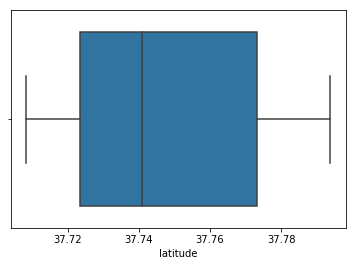

In [234]:
sns.boxplot(bus_stop_location_dataset['latitude'])

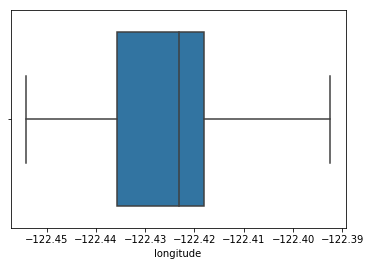

In [235]:
sns.boxplot(bus_stop_location_dataset['longitude'])

Ổn rồi, không có outlier. Vậy là phần geocoding cho các bus stop này khá ổn. Chuyển qua phần map chuyển lên map thôi

## Plot to map

Ở đây mình sẽ sử dụng thư viện folium để đánh dấu các điểm này lên bản đồ

In [236]:
import folium

Tham số *location* ở đây mình set là mean của latitude và longitude để đảm bảo map của mình được view lại điểm giữa

Bên google map api có 1 function để tự động center map nhưng ở folium mình chưa tìm ra. Có bạn nào tìm ra thì cho mình biết với nhé.

In [237]:
bus_stop_map = folium.Map(tiles='cartodbpositron', 
                          location=[
                              bus_stop_location_dataset['latitude'].mean(),
                              bus_stop_location_dataset['longitude'].mean()
                          ],
                          zoom_start=13)


Tiếp theo là tạo các điểm marker dựa trên dataset. Mình sẽ dùng icon time cho những điểm này, ý nói đây là điểm chờ xe bus (mình không tìm thấy icon xe bus trong bootstrap nên dùng tạm), popup ở đây sẽ là các điểm cắt với tên 2 tuyến đường, ví dụ: MISSION ST & 21ST ST

In [238]:
for index, row in bus_stop_location_dataset.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
              popup='{0}: {1} & {2}'.format(index, row['Street_One'], row['Street_Two']),
              icon=folium.Icon(icon='time', color='green')
             ).add_to(bus_stop_map)

Giờ thì show bản đồ lên thôi

In [239]:
bus_stop_map

Nhìn vào bản đồ thì thấy có vẻ vẫn còn 3 điểm bị sai vị trị. Đó là: 
* 59: MISSION ST & 21ST ST
* 36: MISSION ST & ALLISON ST
* 64: MISSION ST & LOWELL ST

Bây giờ chúng ta sẽ fix tọa độ các điểm này

In [240]:
bus_stop_location_dataset.iloc[[59,36,64]]

Street_One  Street_Two   latitude   longitude
59  MISSION ST     21ST ST  37.756761 -122.423667
36  MISSION ST  ALLISON ST  37.711795 -122.441402
64  MISSION ST   LOWELL ST  37.708590 -122.444874

Đoạn này sau 1 hồi thử tìm bằng api không được thì mình quyết định ra google maps chấm 3 điểm để lấy tọa độ luôn. Và đây là kết quả:
* 59: MISSION ST & 21ST ST (37.757039, -122.4197693)
* 36: MISSION ST & ALLISON ST (37.7146065, -122.4432169)
* 64: MISSION ST & LOWELL ST (37.7114504, -122.4486019)




Giờ nhập data thủ công thôi:

In [241]:
bus_stop_location_dataset.at[59,'latitude'] = 37.757039
bus_stop_location_dataset.at[59,'longitude'] = -122.4197693

bus_stop_location_dataset.at[36,'latitude'] = 37.7146065
bus_stop_location_dataset.at[36,'longitude'] = -122.4432169

bus_stop_location_dataset.at[64,'latitude'] = 37.7114504
bus_stop_location_dataset.at[64,'longitude'] = -122.4486019


Plot lại lên bản đồ xem sao

In [242]:
bus_stop_map = folium.Map(tiles='cartodbpositron', 
                          location=[
                              bus_stop_location_dataset['latitude'].mean(),
                              bus_stop_location_dataset['longitude'].mean()
                          ],
                          zoom_start=13)

for index, row in bus_stop_location_dataset.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
              popup='{0}: {1} & {2}'.format(index, row['Street_One'], row['Street_Two']),
              icon=folium.Icon(icon='time', color='green')
             ).add_to(bus_stop_map)
bus_stop_map

Ngon canh ngọt nước, có vẻ hơi cầu toàn 1 chút, nhưng không sao.

Vậy là xong requirement 1. Tiếp theo là requirement số 2

## Requirement 2

Plot tọa độ của nhân viên trong file "Employee_Addresses.csv" lên maps.

Ở đây mình làm tương tự như requirement 1

### Load dataset and understand dataset

In [243]:
employee_dataset = pd.read_csv("Employee_Addresses.csv")
employee_dataset.head()

address  employee_id
0   98 Edinburgh St, San Francisco, CA 94112, USA          206
1        237 Accacia St, Daly City, CA 94014, USA         2081
2    1835 Folsom St, San Francisco, CA 94103, USA          178
3  170 Cambridge St, San Francisco, CA 94134, USA           50
4     16 Roanoke St, San Francisco, CA 94131, USA         1863

In [244]:
employee_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 2 columns):
address        2191 non-null object
employee_id    2191 non-null int64
dtypes: int64(1), object(1)
memory usage: 34.3+ KB


In [245]:
employee_dataset.nunique()

address        1761
employee_id    2191
dtype: int64

Có 1 số điểm hơi lạ ở đây, đó là có 2191 nhân viên (bằng với số quan sát), nhưng chỉ có 1761 unique địa chỉ, chắc là có nhiều đứa ở chung 1 nhà, hoặc là địa chỉ để chung chung (chắc vậy ^^). Mình sẽ tìm hiểu kỹ hơn:

In [246]:
employee_dataset['address'].value_counts().head(10)

2300 16th St, San Francisco, CA 94103, USA           28
869 Schwerin St, Daly City, CA 94014, USA            12
808 Twin Peaks Blvd, San Francisco, CA 94131, USA     8
310 Alemany Blvd, San Francisco, CA 94110, USA        8
2351 16th St, San Francisco, CA 94103, USA            7
1798 Visitacion Ave, San Francisco, CA 94134, USA     7
1399 15th St, San Francisco, CA 94103, USA            6
150 Hampshire St, San Francisco, CA 94103, USA        5
799 Moscow St, San Francisco, CA 94112, USA           5
2460 Alameda St, San Francisco, CA 94103, USA         5
Name: address, dtype: int64

Có vẻ bọn nó ở chung nhà thật =)), ok, fine. địa chỉ thấy cũng khá chi tiết nên chắc cũng không lo lắm về vụ geocoding.

Nhắc thêm nếu bạn nào chưa hiểu geocoding là gì, đây là việc chuyển đổi từ địa chỉ sang tọa độ GPS, hoặc ngược lại từ tọa độ GPS sang địa chỉ (gọi là reverse geocoding)

### GEOCODING STEP

Tương tự như requirement 1, mình sẽ lấy tọa độ của 1761 địa chỉ ở trên.

In [247]:
# Get unique addresses list
addresses = employee_dataset['address'].unique()
addresses

array(['98 Edinburgh St, San Francisco, CA 94112, USA',
       '237 Accacia St, Daly City, CA 94014, USA',
       '1835 Folsom St, San Francisco, CA 94103, USA', ...,
       '330 Oliver St, Daly City, CA 94014, USA',
       '94 W View Ave, San Francisco, CA 94134, USA',
       '499 Treat Ave, San Francisco, CA 94110, USA'], dtype=object)

**Cảnh báo:** Đoạn code tiếp theo đây sẽ chạy hơi lâu và có thể sẽ ngốn chút tiền bạc nếu bạn đã dùng hết $200 credit hàng tháng của google :)

Vì google hạn chế số lượng request gởi đến trong 1 khoảng thời gian ngắn nên chúng ta sẽ tách dataset ra làm 2 phần và delay 1 chút giữa các request.

Đồng thời mình cũng thực hiện lưu ra file sau khi lấy được danh sách tọa độ, đỡ mất công chạy lại sau này. ở đây mình dùng *pickle* để lưu dictionary.

In [248]:
import time
import pickle

def get_location_from_addresses(addrs):
    addresses_dict = {}
    
    for addr in addrs:
        time.sleep(0.5) # delay 0.5 sec
        location = g.geocode(addr,
              components={"city": "San Francisco", "state": "CA", "country": "USA"},
              exactly_one=True)
        if location:
            addresses_dict[addr] = (location.latitude, location.longitude)
        else:
            addresses_dict[addr] = None
    
    return addresses_dict


if not os.path.isfile('addresses_dict.pkl'): # Check if we didn't have a saved file
    mid_point = int(len(addresses)/2)

    addrs_1 = get_location_from_addresses(addresses[:mid_point]) # first part 
    addrs_2 = get_location_from_addresses(addresses[mid_point:]) # second part

    # Merge 2 dicts to get full
    addrs_dict = {**addrs_1, **addrs_2} # Merge 2 dicts in python 3
    
    # Save to a file for later use
    with open('addresses_dict.pkl', 'wb') as f:
        pickle.dump(addrs_dict, f)
else:
    # Load data if we already stored
    with open('addresses_dict.pkl', 'rb') as f:
        addrs_dict = pickle.load(f)

Kiểm tra một chút xem thành quả thế nào

In [249]:
len(addrs_dict)

1761

Kiểm tra xem bao nhiêu tọa độ không tìm ra (None), mình dùng list comprehension ở đây cho nhanh.

In [250]:
unknown_addresses = [k for k, v in addrs_dict.items() if v == None]

In [251]:
unknown_addresses

['2949 Divisadero St, San Francisco, CA 94123, USA',
 'San Francisco War Memorial and Performing Arts Center, 301 Van Ness Ave, San Francisco, CA 94102, USA',
 '3032 Divisadero St, San Francisco, CA 94123, USA',
 '34 Essex St, San Francisco, CA 94105, USA',
 '3035 Divisadero St, San Francisco, CA 94123, USA',
 '100 Van Ness Avenue, 100 Van Ness Ave, San Francisco, CA 94102, USA',
 '1099 Bryant St, San Francisco, CA 94103, USA',
 '2599 Divisadero St, San Francisco, CA 94115, USA',
 '298 Peru Ave, San Francisco, CA 94112, USA',
 ' B Mission St, San Francisco, CA 94112, USA']

In [252]:
print("Có {0} địa chỉ không tìm thấy tọa độ".format(len(unknown_addresses)))

Có 10 địa chỉ không tìm thấy tọa độ


Cũng không tệ lắm, chỉ có số ít địa chỉ không tìm thấy. Mình quyết định thêm thủ công vào, 1 số điểm mình search google để tìm vị trí, 1 số điểm còn lại mình dùng Bing maps. Mình thấy Bing maps khá tốt trong việc tìm các địa chỉ này, thậm chí có một số địa chỉ google maps không tìm ra mà Bing maps lại có thể tìm ra, ví dụ như các địa chỉ ở cái đường Divisadero St.

Thiết nghĩ Bing maps có thể không sử dụng các thông tin địa chỉ mà người dùng đưa lên để định vị như Google mà dùng các công thức tính khoảng cách này nọ để suy ra địa chỉ (vì người dùng đưa tọa độ lên Bing maps chắc không nhiều). Mà thôi kệ nó, miễn có được tọa độ là được, cũng không cần chính xác hoàn toàn. Có thể lần sau mình sẽ sử dụng dịch vụ này của Bing maps để xem có chính xác hơn google maps không.

Ở đây mình có thể sử dụng geopy và dùng đối tượng geopy.geocoders.Bing để gọi api của Bing maps nhưng mình thấy khá mất thời gian để tạo api key nên thôi, mình dùng thủ công. :)

In [253]:
addrs_dict['2949 Divisadero St, San Francisco, CA 94123, USA'] = (37.79686, -122.44255)
addrs_dict['San Francisco War Memorial and Performing Arts Center, 301 Van Ness Ave, San Francisco, CA 94102, USA'] = (37.7785999, -122.4208)
addrs_dict['3032 Divisadero St, San Francisco, CA 94123, USA'] = (37.79759, -122.44218)
addrs_dict['34 Essex St, San Francisco, CA 94105, USA'] = (37.7859239, -122.3952052)
addrs_dict['3035 Divisadero St, San Francisco, CA 94123, USA'] = (37.79764, -122.44271)
addrs_dict['100 Van Ness Avenue, 100 Van Ness Ave, San Francisco, CA 94102, USA'] = (37.77672, -122.41918)
addrs_dict['1099 Bryant St, San Francisco, CA 94103, USA'] = (37.7713541, -122.4083664)
addrs_dict['2599 Divisadero St, San Francisco, CA 94115, USA'] = (37.7932875, -122.4415585)
addrs_dict['298 Peru Ave, San Francisco, CA 94112, USA'] = (37.727483, -122.4274577)
addrs_dict[' B Mission St, San Francisco, CA 94112, USA'] = (37.68547, -122.464215)

Kiểm tra lại lần nữa cho chắc ăn

In [254]:
print("Số lượng address trong dictionary: ", len(addrs_dict))
unknown_addresses = [k for k, v in addrs_dict.items() if v == None]
print("Số lượng địa chỉ không tìm được tọa độ: ", len(unknown_addresses))

Số lượng address trong dictionary:  1761
Số lượng địa chỉ không tìm được tọa độ:  0


Có thể bạn thắc mắc tại sao mình print số lượng địa chỉ trong dictionary ra, mục đích của mình in ra là để kiểm tra lại số lượng address trong dict có bằng số lượng address ban đầu hay không, có thể do 1 số quá trình copy paste nào đó mình làm thủ công ở trên có vấn đề thì con số này sẽ khác số ban đầu, vì khác key.

Ban đầu là 1761 địa chỉ, bây giờ vẫn là 1761 địa chỉ, good job man :)

Bây giờ merge nó vào trong employee_dataset thôi, ở đây mình vẫn dùng hàm *apply* của thư viện pandas nhé.

In [255]:
def add_employee_location(row):
    addr = row['address']
    row['latitude'] = addrs_dict[addr][0] # First element of the list is the latitude
    row['longitude'] = addrs_dict[addr][1] # And the second is longitude
    
    return row

employee_dataset = employee_dataset.apply(add_employee_location, axis=1) # axis=1 mean that we are applying the function to each row

In [256]:
employee_dataset.head()

address  employee_id   latitude  \
0   98 Edinburgh St, San Francisco, CA 94112, USA          206  37.727475   
1        237 Accacia St, Daly City, CA 94014, USA         2081  37.704205   
2    1835 Folsom St, San Francisco, CA 94103, USA          178  37.767932   
3  170 Cambridge St, San Francisco, CA 94134, USA           50  37.729642   
4     16 Roanoke St, San Francisco, CA 94131, USA         1863  37.736240   

    longitude  
0 -122.427326  
1 -122.415878  
2 -122.415181  
3 -122.419661  
4 -122.431322

Bây giờ check xem thử có tọa độ nào bị thiếu không (cho chắc ăn í mà)

In [257]:
employee_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
address        2191 non-null object
employee_id    2191 non-null int64
latitude       2191 non-null float64
longitude      2191 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 68.5+ KB


In [258]:
employee_dataset.describe()

employee_id     latitude    longitude
count  2191.000000  2191.000000  2191.000000
mean   1096.000000    37.744278  -122.425318
std     632.631541     0.026901     0.014035
min       1.000000    37.685470  -122.464215
25%     548.500000    37.720889  -122.435494
50%    1096.000000    37.736057  -122.425524
75%    1643.500000    37.767910  -122.414808
max    2191.000000    37.798921  -122.388324

### Plot to map

Ở đây mình khi mình thử map hơn 2000 điểm lên bản đồ, jupyter notebook báo lỗi *IOPub data rate exceeded.* Mình có thể nâng iopub_data_rate_limit ở config --NotebookApp.iopub_data_rate_limit lên để cải thiện tình hình nhưng mình nghĩ nó không phải là best solution. Nên mình quyết định sử dụng tính năng gom nhóm marker của folium plugin là  FastMarkerCluster, mình có thử MarkerCluster plugin nhưng trên 2000 point là không render đc. Bây giờ các marker sẽ gom cụm lại, khi chúng ta zoom vào thì sẽ dần dần thấy chi tiết.

Ở đây sẽ có 1 số marker khi zoom vào sẽ trùng nhau do nhiều người có ở chung nhà ^^, chúng ta có thể remove trước khi plot lên map, nhưng do ở đây mình sử dụng cluster để gom nhóm lại nên nếu remove mấy địa chỉ trùng thì số lượng employee trong 1 khu vực sẽ không có giống như lúc đầu nữa nên mình quyết định không remove.

In [259]:
from folium.plugins import FastMarkerCluster

employee_map = folium.Map(tiles='cartodbpositron', 
                          location=[
                              employee_dataset['latitude'].mean(),
                              employee_dataset['longitude'].mean()
                          ],
                          zoom_start=13)

employee_map.add_child(FastMarkerCluster(employee_dataset[['latitude', 'longitude']].values.tolist()))
employee_map

Nhìn qua map thì thấy employee tập trung đông nhất ở phía đông bắc San Francisco (Chắc dễ ngắm mặt trời mọc =))), Phía Tây hầu như ko ai ở, có thể dataset này chủ yếu xoay quanh cái đường Mission ST nên nó vậy.

## Requirement 3

Plot both dataset to map

Đến bây giờ chúng ta đã có 2 dataset ở trên rồi nên chỉ việc map lên trên cùng 1 map thôi.

Mình sẽ plot các điểm dừng xe bus hiện rõ lên bằng marker màu xanh dương. Còn các vị trí của nhân viên thì mình sẽ dùng MarkerCluster vì nó quá nhiều.

Đầu tiên là lấy tọa độ trung tâm của cả 2 dataset

In [260]:
centroid_lat = np.concatenate([
    bus_stop_location_dataset['latitude'].values,
    employee_dataset['latitude'].values
]).mean()

centroid_long = np.concatenate([
    bus_stop_location_dataset['longitude'].values,
    employee_dataset['longitude'].values
]).mean()

In [261]:
print("Centroid location: {0}, {1}".format(centroid_lat, centroid_long))

Centroid location: 37.74438840787878, -122.42527221324674


Tạo map

In [262]:
bus_map = folium.Map(tiles='cartodbpositron', 
                          location=[
                              centroid_lat,
                              centroid_long
                          ],
                          zoom_start=13)


**Plot điểm dừng xe bus**

In [263]:
for index, row in bus_stop_location_dataset.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
              popup='{0}: {1} & {2}'.format(index, row['Street_One'], row['Street_Two']),
              icon=folium.Icon(icon='time', color='blue')
             ).add_to(bus_map)

**Plot địa chỉ nhân viên**

Ở đây mình có dùng function callback để thay đổi icon của marker

In [264]:
callback = """\
function (row) {
    var icon, marker;
    icon = L.AwesomeMarkers.icon({
        icon: "user", markerColor: "green"});
    marker = L.marker(new L.LatLng(row[0], row[1]));
    marker.setIcon(icon);
    return marker;
};
"""

FastMarkerCluster(
    data=employee_dataset[['latitude', 'longitude']].values.tolist(),
    callback=callback
).add_to(bus_map)

In [265]:
bus_map

## Additional info

Nhìn vào map chúng ta thấy rằng nhân viên hầu hết sống xung quanh đường Mission ST (chắc để đi xe bus cho nhanh).

Vậy bây giờ câu hỏi đặt ra là có nhiều điểm dừng xe bus như vậy, vậy nhân viên nên ra điểm nào để đón xe?

Tất nhiên là điểm gần nhất rồi. Vậy bây giờ mình sẽ dựa trên khoảng cách giữa địa chỉ nhân viên và các trạm xe bus để đưa ra thông tin điểm dừng xe bus gần nhất cho mỗi nhân viên.

Ở đây mình chỉ thao tác trên dataset và demo 1 vài nhân viên lên map. Vì jupyter notebook ko có nhiều thứ cho mình custom, nếu đây là 1 cái map làm trên nên web như google map thì sẽ có nhiều thứ hay ho có thể làm, ví dụ như nhập mã số nhân viên vào box, map sẽ hiện lên điểm dừng xe bus gần nhất và hiện đường đi đến đó.

Đầu tiên là xem lại employee_dataset

In [266]:
employee_dataset.head(5)

address  employee_id   latitude  \
0   98 Edinburgh St, San Francisco, CA 94112, USA          206  37.727475   
1        237 Accacia St, Daly City, CA 94014, USA         2081  37.704205   
2    1835 Folsom St, San Francisco, CA 94103, USA          178  37.767932   
3  170 Cambridge St, San Francisco, CA 94134, USA           50  37.729642   
4     16 Roanoke St, San Francisco, CA 94131, USA         1863  37.736240   

    longitude  
0 -122.427326  
1 -122.415878  
2 -122.415181  
3 -122.419661  
4 -122.431322

Tiếp theo là trên mỗi nhân viên, tìm ra điểm dừng xe bus gần nhất và tọa độ của nó. Ở đây mình dùng luôn chức năng tính khoảng cách của thử viện geopy. Có nhiều cách tính khoảng cách giữa 2 điểm trên bản đồ, mình không đi quá sâu vào vấn đề này nên sẽ sử dụng hàm tính khoảng cách mặc định của geopy.

Flow như sau:
* Lặp từng địa chỉ của nhân viên.
* Với mỗi địa chỉ nhân viên, tính tất cả các khoảng cách từ tọa độ địa chỉ của nhân viên đó đến các điểm dừng xe bus
* Lấy địa điểm xe bus có khoảng cách đến tọa độ nhân viên ngắn nhất và lưu lại vào dataset

In [267]:
# Import distance module
from geopy import distance

def find_nearest_busstop(row):
    emp_location = (row['latitude'], row['longitude'])
    
    nearest_bus_stop = {}
    # loop through all bus stops
    for index, bus_stop in bus_stop_location_dataset.iterrows():
        busstop_location = (bus_stop['latitude'], bus_stop['longitude'])
        emp_bus_distance = distance.distance(emp_location, busstop_location).km #get distance between 2 point in KM
        
        if index == 0:
            # set nearest bus stop is the first bus stop
            nearest_bus_stop['address'] = bus_stop['Street_One'] + ' & ' + bus_stop['Street_Two']
            nearest_bus_stop['latitude'] = bus_stop['latitude']
            nearest_bus_stop['longitude'] = bus_stop['longitude']
            nearest_bus_stop['distance'] = emp_bus_distance
        else:
            # compare with previous nearest_bus_stop and set new nearest bus stop if the new one is nearer
            if emp_bus_distance < nearest_bus_stop['distance']:
                nearest_bus_stop['address'] = bus_stop['Street_One'] + ' & ' + bus_stop['Street_Two']
                nearest_bus_stop['latitude'] = bus_stop['latitude']
                nearest_bus_stop['longitude'] = bus_stop['longitude']
                nearest_bus_stop['distance'] = emp_bus_distance
    
    # Store the nearest bus stop to employee dataset
    row['nearest_bus_stop_addr'] = nearest_bus_stop['address']
    row['nearest_bus_stop_latitude'] = nearest_bus_stop['latitude']
    row['nearest_bus_stop_longitude'] = nearest_bus_stop['longitude']
    row['nearest_bus_stop_distance_in_km'] = nearest_bus_stop['distance']
    
    return row

employee_dataset = employee_dataset.apply(find_nearest_busstop, axis=1)

employee_dataset.head(5)

address  employee_id   latitude  \
0   98 Edinburgh St, San Francisco, CA 94112, USA          206  37.727475   
1        237 Accacia St, Daly City, CA 94014, USA         2081  37.704205   
2    1835 Folsom St, San Francisco, CA 94103, USA          178  37.767932   
3  170 Cambridge St, San Francisco, CA 94134, USA           50  37.729642   
4     16 Roanoke St, San Francisco, CA 94131, USA         1863  37.736240   

    longitude          nearest_bus_stop_addr  nearest_bus_stop_latitude  \
0 -122.427326  MISSION ST & CASTLE MANOR AVE                  37.729231   
1 -122.415878        MISSION ST & GENEVA AVE                  37.716407   
2 -122.415181           MISSION ST & 14TH ST                  37.768284   
3 -122.419661       MISSION ST & BOSWORTH ST                  37.733685   
4 -122.431322       MISSION ST & BOSWORTH ST                  37.733685   

   nearest_bus_stop_longitude  nearest_bus_stop_distance_in_km  
0                 -122.430845                         0.366363  
1                 -122.441087                         2.602953  
2                 -122.420007                         0.427062  
3                 -122.426396                         0.744203  
4                 -122.426396                         0.518640

Đã xong, giờ mình explore 1 chút về cái khoảng cách này xem sao

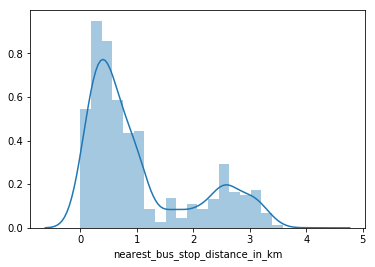

In [268]:
sns.distplot(employee_dataset['nearest_bus_stop_distance_in_km'])

Nhìn vào phân bố ta thấy có, hầu hết nhân viên chỉ mất khoảng chưa tới 1km để đến điểm dừng xe bus gần nhất trên đường Mission ST, và có 1 số nhỏ khác mất khoảng 2.5km. (Đây là giả thuyết dựa trên việc chỉ có các điểm dừng xe bus ở trên đường Mission ST)

Cuối cùng là mình thử plot lên map khoảng 5 nhân viên random và hiện lên các điểm xe bus gần nhất cho 5 nhân viên đó. Những nhân viên có cùng màu nghĩa là cùng chung 1 điểm dừng xe bus gần nhất.

In [269]:
random_five_indices = np.random.randint(0, len(employee_dataset), 5) # pick random 5 employee

five_employee = employee_dataset.iloc[random_five_indices] # Slice those 5 employee from employee_dataset

five_employee

address  employee_id  \
1892         98 Lisbon St, San Francisco, CA 94112, USA         1264   
773          2300 16th St, San Francisco, CA 94103, USA          811   
703           107 28th St, San Francisco, CA 94131, USA          604   
809            155 Oriente St, Daly City, CA 94014, USA          114   
55    777 Twin Peaks Blvd, San Francisco, CA 94131, USA         1536   

       latitude   longitude    nearest_bus_stop_addr  \
1892  37.726692 -122.430102  MISSION ST & TINGLEY ST   
773   37.765905 -122.407965     MISSION ST & 16TH ST   
703   37.745280 -122.425018     MISSION ST & 29TH ST   
809   37.705371 -122.414249  MISSION ST & SENECA AVE   
55    37.749135 -122.449460  MISSION ST & RANDALL ST   

      nearest_bus_stop_latitude  nearest_bus_stop_longitude  \
1892                  37.728252                 -122.431806   
773                   37.765057                 -122.419698   
703                   37.744038                 -122.420915   
809                   37.717675                 -122.440149   
55                    37.739779                 -122.423676   

      nearest_bus_stop_distance_in_km  
1892                         0.229259  
773                          1.038095  
703                          0.386966  
809                          2.660939  
55                           2.498593

**Plot to map**

Find centroid location

In [270]:
centroid_of_five_lat = np.concatenate([
    employee_dataset['latitude'],
    employee_dataset['nearest_bus_stop_latitude']
]).mean()

centroid_of_five_long = np.concatenate([
    employee_dataset['longitude'],
    employee_dataset['nearest_bus_stop_longitude']
]).mean()


Create a map

In [271]:
import random
# Define colors
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
          'beige', 'darkblue', 'darkgreen', 'cadetblue',
          'darkpurple', 'pink', 'gray', 'black']

random.shuffle(colors) # shuffle the colors

# set color for addresses
five_bus_stop_color_dict = {}

for index, addr in enumerate(five_employee['nearest_bus_stop_addr'].values):
    five_bus_stop_color_dict[addr] = colors.pop(index) # get random color


# initialize Map object
five_emp_map = folium.Map(tiles='cartodbpositron', 
                          location=[
                              centroid_of_five_lat,
                              centroid_of_five_long
                          ],
                          zoom_start=13)

for index, row in five_employee.iterrows():
    # create employee marker
    folium.Marker([row['latitude'], row['longitude']],
              popup='{0}: {1}'.format(row['employee_id'], row['nearest_bus_stop_addr']),
              icon=folium.Icon(icon='user', color=five_bus_stop_color_dict[row['nearest_bus_stop_addr']])
             ).add_to(five_emp_map)
    
    folium.Marker([row['nearest_bus_stop_latitude'], row['nearest_bus_stop_longitude']],
              popup='{0}'.format(row['nearest_bus_stop_addr']),
              icon=folium.Icon(icon='time', color=five_bus_stop_color_dict[row['nearest_bus_stop_addr']])
             ).add_to(five_emp_map)
    
five_emp_map

**I'm done**

Mình nghĩ ngang đây là được rồi.

Hãy cho mình biết nếu các bạn có ý tưởng nào đó hay ho hơn với dataset này nhé. ^^